Importing Dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [60]:
gold_data = pd.read_csv('GoldPricePredictionData.csv')

In [61]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [62]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [63]:
gold_data.shape

(2290, 6)

Checking for Missing Values

In [64]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [65]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Getting the Statistical Info

In [66]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Checking the Correlation

<ipython-input-67-0cfb3be8129e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

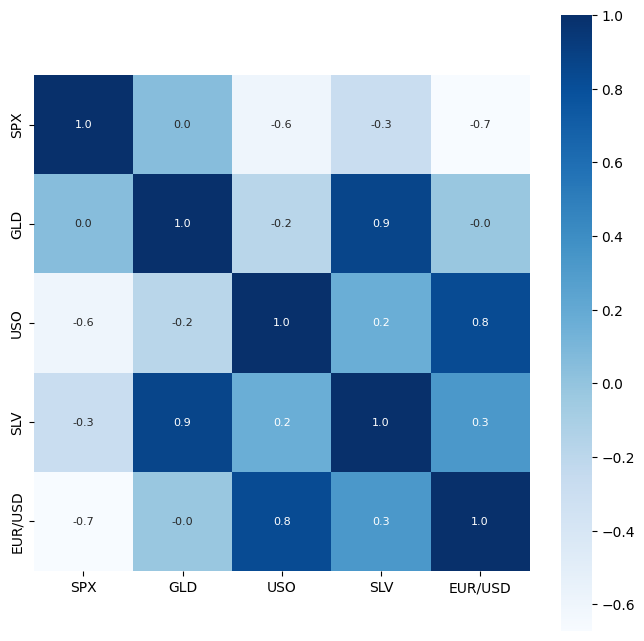

In [67]:
correlation = gold_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [68]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


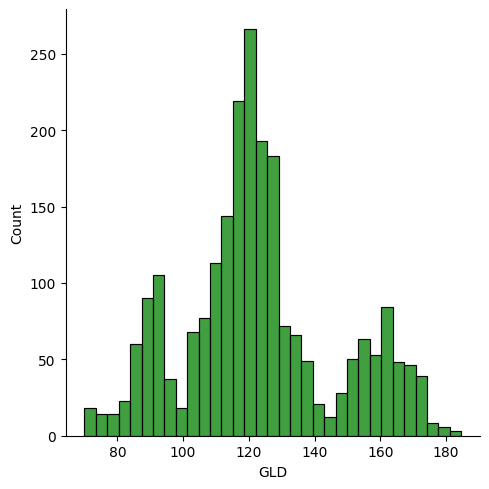

In [69]:
sns.displot(gold_data['GLD'],color='green')

Spltiing Features and Target

In [70]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [71]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [72]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training

Random Forest Regressor

In [74]:
regressor = RandomForestRegressor(n_estimators=100)

In [75]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [76]:
test_data_prediction = regressor.predict(X_test)

In [77]:
print(test_data_prediction)

[168.53169922  82.1207999  115.98950023 127.70330057 120.64060147
 154.81139753 150.29919857 126.1068003  117.43679887 125.9955007
 116.5170012  171.47779993 141.60289877 168.19119887 115.03990021
 117.63430019 138.92160325 170.09220086 159.33720227 161.00169957
 155.04089987 125.22830017 175.67079965 157.36740372 125.25600027
  93.70609947  77.55600017 120.45289993 119.0840991  167.41979977
  88.16910039 125.40640012  91.02480045 117.60480032 121.185799
 136.40440024 115.54640167 115.24590069 145.23300003 107.29880111
 104.72480253  87.25409777 126.5692008  117.94169966 153.53849856
 119.80809967 108.42040036 108.2832981   93.19000027 127.23069745
  75.45299986 113.73989969 121.6077001  111.34259902 118.73499872
 120.38619923 159.13379968 166.75640137 146.8036964   85.78839852
  94.5848005   86.774399    90.33430026 119.10920083 126.43890026
 127.70020021 169.41099972 122.18179939 117.45929929  98.20090024
 168.10010116 143.08829842 132.73140266 121.09280204 120.54429942
 119.81850044

R Squared Error

In [78]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.989772068118376


Compare Actual and Predicted values

In [79]:
Y_test = list(Y_test)

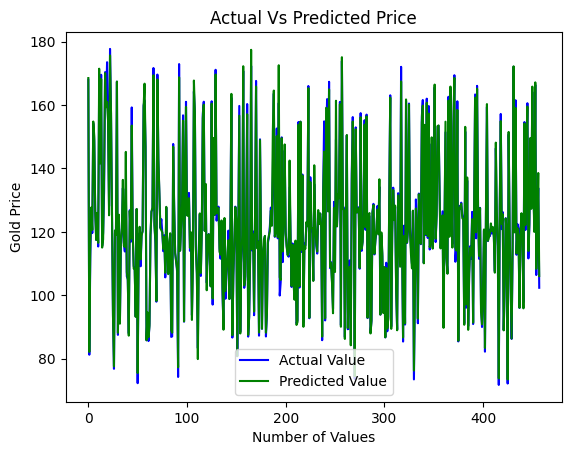

In [80]:
plt.plot(Y_test, color='blue',label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()